In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [72]:
file_path = "member.uid___A001_X2d20_X399f.SPT0027-50_sci.spw29.cube.I.pbcor.fits-Z-profile-Region_4-Statistic_Mean-Coordinate_Current-2025-07-10-13-41-41.tsv"

df = pd.read_csv(file_path, sep="\t", skiprows=5)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')
df = df.dropna()

x = df[df.columns[0]]
y = df[df.columns[1]] * 1000  #Jy → mJy

my_lines =[(98.804, "C18O(4-3)"), 
           #(99.182, "13CO v=0(4-3)"), 
           (99.711, "HCN v=0(5-4)"), 
           (100.338, "HCO+ v=0(5-4)")] #freq. , label

In [73]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size)/kernel_size
    return np.convolve(y, kernel, mode="same")

def rebin_spectrum(x, y, bin_size):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned

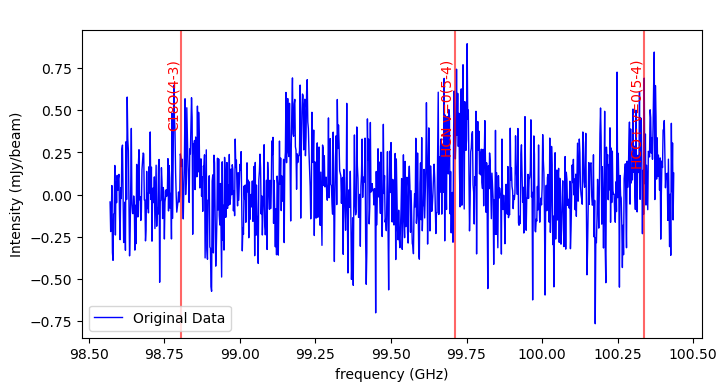

In [74]:
#original data
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Original Data", color="blue", linewidth=1)
plt.xlabel("frequency (GHz)")
plt.ylabel("Intensity (mJy/beam)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y)*0.9, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.title("    ")
plt.grid(False)
plt.legend()
plt.show()

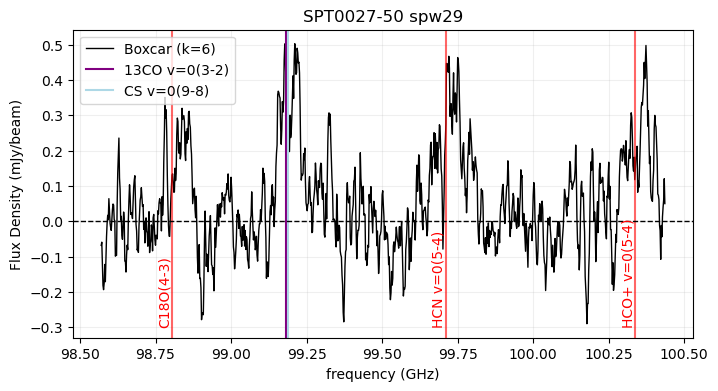

In [75]:
'''
#if you need to binning + boxcar smoothing

x_binned, y_binned = rebin_spectrum(x, y, bin_size=    )
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=    )

plt.figure(figsize=(8, 4))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=1, label="binning(b=    )+Boxcar (k=    )")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("    ")
plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()

'''


#if you just need boxcar smoothing

y_boxcar = boxcar_smooth(y, kernel_size=6)

plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=6)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_boxcar)*-0.6, label, rotation=90, color="red", fontsize=10, ha='right', va='bottom')
plt.axvline(99.182, color="purple", label="13CO v=0(3-2)")
plt.axvline(99.190, color="lightblue", label="CS v=0(9-8)")
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("SPT0027-50 spw29")
#plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()


In [76]:
from astropy import units as u
from astropy.coordinates import SpectralCoord

rest_freq = 443.116 * u.GHz
freq = x.values * u.GHz

spec = SpectralCoord(freq, doppler_rest=rest_freq)
spec_radio = spec.with_velocity_convention('radio')

velocity = spec_radio.radial_velocity.to(u.km/u.s).value

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(velocity, y, label='HCN Spectrum')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Intensity (mJy/beam)')
plt.title('Velocity profile')
plt.legend()
plt.show()


AttributeError: SpectralCoord instance has no attribute 'with_velocity_convention'

In [99]:
'''c = 299792.458  #km/s
rest_freq = 443.116  #GHz
z = 3.444

#紅移後的譜線中心頻率（觀測頻率）
obs_rest_freq = rest_freq / (1 + z)

freq = x.values  #觀測頻率 (GHz)

velocity = c * (obs_rest_freq - freq) / obs_rest_freq



plt.figure(figsize=(8,4))
plt.plot(velocity, y_boxcar, label='HCN Spectrum', linewidth=1, color="black")
plt.axvline(0, color="blue", linestyle="--")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlim(-1500,1500)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Intensity (mJy/beam)')
plt.title(f'HCN (z={z})')
plt.legend()
plt.show()

'''

'c = 299792.458  #km/s\nrest_freq = 443.116  #GHz\nz = 3.444\n\n#紅移後的譜線中心頻率（觀測頻率）\nobs_rest_freq = rest_freq / (1 + z)\n\nfreq = x.values  #觀測頻率 (GHz)\n\nvelocity = c * (obs_rest_freq - freq) / obs_rest_freq\n\n\n\nplt.figure(figsize=(8,4))\nplt.plot(velocity, y_boxcar, label=\'HCN Spectrum\', linewidth=1, color="black")\nplt.axvline(0, color="blue", linestyle="--")\nplt.axhline(0, color="black", linestyle="--", linewidth=1)\nplt.xlim(-1500,1500)\nplt.xlabel(\'Velocity (km/s)\')\nplt.ylabel(\'Intensity (mJy/beam)\')\nplt.title(f\'HCN (z={z})\')\nplt.legend()\nplt.show()\n\n'

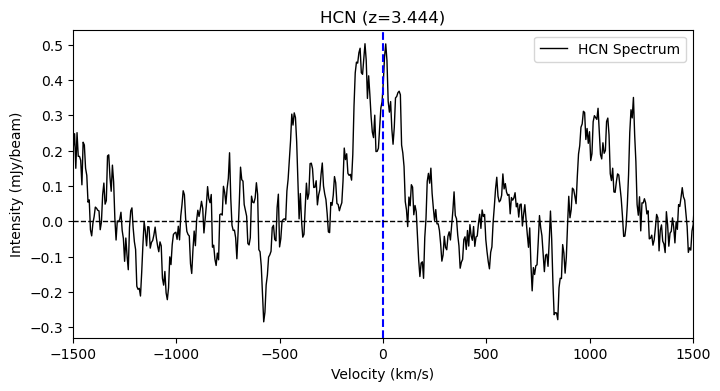

In [100]:
c = 299792.458  #km/s
rest_freq = 440.765  #GHz
z = 3.444

#紅移後的譜線中心頻率（觀測頻率）
obs_rest_freq = rest_freq / (1 + z)

freq = x.values  #觀測頻率 (GHz)

velocity = c * (obs_rest_freq - freq) / obs_rest_freq



plt.figure(figsize=(8,4))
plt.plot(velocity, y_boxcar, label='HCN Spectrum', linewidth=1, color="black")
plt.axvline(0, color="blue", linestyle="--")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Intensity (mJy/beam)')
plt.xlim(-1500, 1500)
plt.title(f'HCN (z={z})')
plt.legend()
plt.show()

